Move around directories

In [1]:
import os
os.chdir('/Volumes/Nondh\'s HDD/m12i_res7000_md/')
#os.chdir('/Users/nondh/Documents/stream/')

In [2]:
import gizmo_analysis as gizmo
import wutilities as ut
import rockstar_analysis as rockstar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
# read in particles at present day
part = gizmo.io.Read.read_snapshots(['star'], 'redshift', 0, assign_principal_axes=True,
                                 assign_orbit=True)


# in wutilities.simulation.Snapshot():
  reading:  snapshot_times.txt
  input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark.2    (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

  cannot find MUSIC config file: */*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle properties

* assigning center of galaxy/halo:
  position = (41792.147, 44131.235, 46267.679) [kpc comoving]
  ve

In [5]:
# read in halo catalogue at present day
hal = rockstar.io.IO.read_catalogs('redshift', 0)


# in wutilities.simulation.Snapshot():
  reading:  snapshot_times.txt
  input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in rockstar_analysis.rockstar_io.IO():
* read 25109 halos from:  halo_600.hdf5

# in rockstar_analysis.rockstar_io.Particle():
* read 25109 halos with star particles from:  star_600.hdf5



In [6]:
list(part['star'].keys())

['position',
 'mass',
 'massfraction',
 'id.child',
 'id.generation',
 'id',
 'potential',
 'form.scalefactor',
 'velocity',
 'host.distance',
 'host.distance.total',
 'host.distance.norm',
 'host.velocity',
 'host.velocity.total',
 'host.velocity.tan',
 'host.velocity.rad',
 'host.velocity.ratio',
 'host.velocity.norm']

In [7]:
# how many stars are there in total
len(part['star']['id'])

13976485

In [8]:
# read in indices of stars in the stream
st = np.loadtxt('../one-stream-ids.txt', dtype=int)
len(st)

1960

In [9]:
part['star']['position'][st]

array([[41783.51759699, 44119.12594841, 46230.99219849],
       [41781.60840905, 44117.49452204, 46232.40109432],
       [41786.78049642, 44116.25877781, 46232.5553281 ],
       ...,
       [41808.48050546, 44143.51437461, 46302.74794439],
       [41807.70845264, 44142.02957324, 46302.51956791],
       [41794.43296363, 44179.23146556, 46274.21574444]])

In [10]:
part['star']['host.distance'][st]

array([[ -8.62895659, -12.10864112, -36.68702365],
       [-10.53814453, -13.74006749, -35.27812782],
       [ -5.36605716, -14.97581171, -35.12389404],
       ...,
       [ 16.33395189,  12.27978508,  35.06872225],
       [ 15.56189907,  10.79498371,  34.84034576],
       [  2.28641005,  47.99687603,   6.53652229]])

Try plotting the positions of the stars in the stream and compared to Robyn's plots

In [11]:
# transform to principal axis frame
pos_pa = ut.coordinate.get_coordinates_rotated(part['star']['host.distance'][st],part.principal_axes_vectors)

Text(0, 0.5, 'y [kpc]')

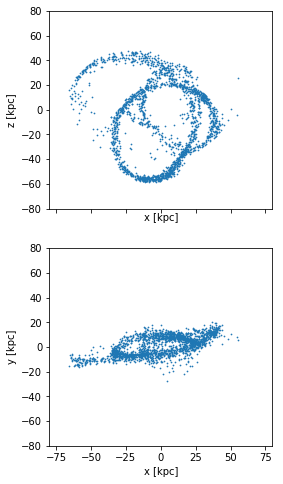

In [12]:
fig, ax = plt.subplots(2,figsize=(4,8),sharex=True)
ax[0].scatter(pos_pa[:,0], pos_pa[:,2], s=0.5)
ax[0].set_xlim((-80, 80))
ax[0].set_ylim((-80, 80))
ax[0].set_xlabel('x [kpc]')
ax[0].set_ylabel('z [kpc]')
ax[1].scatter(pos_pa[:,0], pos_pa[:,1], s=0.5)
ax[1].set_xlim((-80, 80))
ax[1].set_ylim((-80, 80))
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('y [kpc]')

![image](onestream.png)

In [13]:
list(hal.keys())

['accrete.rate',
 'accrete.rate.100Myr',
 'accrete.rate.tdyn',
 'am.phantom',
 'am.progenitor.main',
 'axis.b/a',
 'axis.c/a',
 'descendant.snapshot',
 'host.distance',
 'host.index',
 'host.velocity',
 'host.velocity.rad',
 'host.velocity.tan',
 'id',
 'infall.first.mass',
 'infall.first.snapshot',
 'infall.first.vel.circ.max',
 'infall.mass',
 'infall.snapshot',
 'infall.vel.circ.max',
 'major.merger.snapshot',
 'mass',
 'mass.180m',
 'mass.200c',
 'mass.200m',
 'mass.500c',
 'mass.bound',
 'mass.half.snapshot',
 'mass.lowres',
 'mass.peak',
 'mass.peak.snapshot',
 'mass.vir',
 'position',
 'position.offset',
 'progenitor.number',
 'radius',
 'scale.radius',
 'scale.radius.klypin',
 'spin.bullock',
 'spin.peebles',
 'tree.index',
 'vel.circ.max',
 'vel.circ.peak',
 'vel.std',
 'velocity',
 'velocity.offset',
 'lowres.mass.frac',
 'star.form.time.100',
 'star.form.time.50',
 'star.form.time.90',
 'star.form.time.95',
 'star.form.time.dif.68',
 'star.indices',
 'star.mass',
 'star.mass

In [14]:
hal['position']

array([[41919.72 , 42467.152, 46056.57 ],
       [41899.176, 42480.56 , 46036.496],
       [41898.164, 42490.344, 46032.867],
       ...,
       [41803.336, 44521.242, 46378.133],
       [41802.293, 44536.598, 46367.81 ],
       [41879.547, 44538.234, 46370.016]], dtype=float32)

In [15]:
pos_pa_hal = ut.coordinate.get_coordinates_rotated(hal['host.distance'],part.principal_axes_vectors)

In [16]:
len(pos_pa_hal)

25109

Try plotting to see the distribution of halos

Text(0, 0.5, 'y [kpc]')

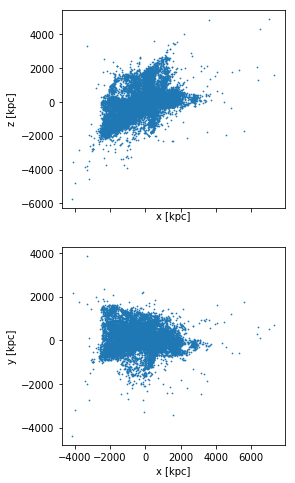

In [17]:
fig, ax = plt.subplots(2,figsize=(4,8),sharex=True)
ax[0].scatter(pos_pa_hal[:,0], pos_pa_hal[:,2], s=0.5)
ax[0].set_xlabel('x [kpc]')
ax[0].set_ylabel('z [kpc]')
ax[1].scatter(pos_pa_hal[:,0], pos_pa_hal[:,1], s=0.5)
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('y [kpc]')

Text(0, 0.5, 'y [kpc]')

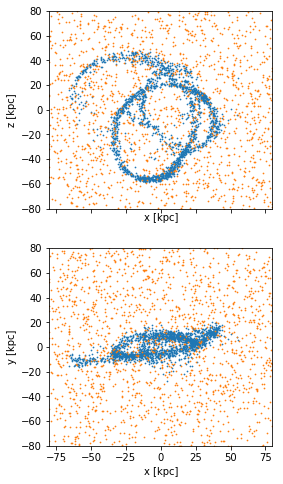

In [18]:
fig, ax = plt.subplots(2,figsize=(4,8),sharex=True)
ax[0].scatter(pos_pa[:,0], pos_pa[:,2], s=0.5)
ax[0].scatter(pos_pa_hal[:,0], pos_pa_hal[:,2], s=0.5)
ax[0].set_xlim((-80, 80))
ax[0].set_ylim((-80, 80))
ax[0].set_xlabel('x [kpc]')
ax[0].set_ylabel('z [kpc]')
ax[1].scatter(pos_pa[:,0], pos_pa[:,1], s=0.5)
ax[1].scatter(pos_pa_hal[:,0], pos_pa_hal[:,1], s=0.5)
ax[1].set_xlim((-80, 80))
ax[1].set_ylim((-80, 80))
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('y [kpc]')

Compute distances between halos and stars in the stream in the principal axes frame

In [19]:
# p_star = part['star']['host.distance'][st]
# p_hal = hal['host.distance']
hal['id']
# seems like halo id is the same as the index in the array

array([    0,     1,     2, ..., 25106, 25107, 25108], dtype=int32)

In [20]:
# find indices of halo that are within threshold [kpc] from the nearest star in the stream
def compute_dist(pos_pa_hal, pos_pa, threshold = 2):
    encounter = []
    dist_list = []
    for i in range(len(pos_pa_hal)):
        if np.absolute(pos_pa_hal[i,0]) > 80 or np.absolute(pos_pa_hal[i,1]) > 80 \
        or np.absolute(pos_pa_hal[i,2]) > 80:
            continue
        else:
            mindist = np.infty
            for j in range(len(pos_pa)):
                d_sq = (pos_pa_hal[i,0]-pos_pa[j,0])**2 + (pos_pa_hal[i,1]-pos_pa[j,1])**2 + \
                (pos_pa_hal[i,2]-pos_pa[j,2])**2
                if d_sq < mindist:
                    mindist = d_sq
            
            if mindist < threshold**2:
                encounter.append(i)
                dist_list.append(mindist)
    return np.array(encounter), np.sqrt(np.array(dist_list))
    

In [21]:
halo_indices, mindist_array = compute_dist(pos_pa_hal, pos_pa)

In [22]:
pos_pa_hal_bak = pos_pa_hal
pos_pa_hal = pos_pa_hal[halo_indices]

Text(0, 0.5, 'y [kpc]')

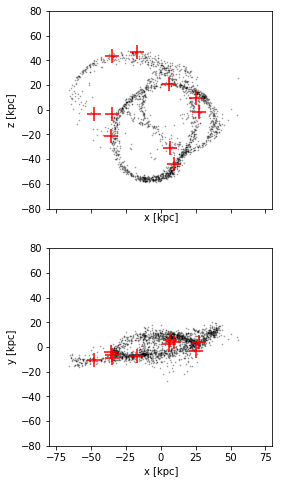

In [23]:
fig, ax = plt.subplots(2,figsize=(4,8),sharex=True)
ax[0].scatter(pos_pa[:,0], pos_pa[:,2], s=0.5, c='black', alpha=0.3)
ax[0].scatter(pos_pa_hal[:,0], pos_pa_hal[:,2], s=200, marker='+', c='red')
ax[0].set_xlim((-80, 80))
ax[0].set_ylim((-80, 80))
ax[0].set_xlabel('x [kpc]')
ax[0].set_ylabel('z [kpc]')
ax[1].scatter(pos_pa[:,0], pos_pa[:,1], s=0.5, c='black', alpha=0.3)
ax[1].scatter(pos_pa_hal[:,0], pos_pa_hal[:,1], s=200, marker='+', c='red')
ax[1].set_xlim((-80, 80))
ax[1].set_ylim((-80, 80))
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('y [kpc]')

In [24]:
# minimum distances in kpc
mindist_array

array([1.95158441, 1.23411376, 1.91949902, 1.09483226, 1.63215942,
       1.326971  , 1.29322373, 0.84551953, 1.46665974, 1.93575588])

In [25]:
# masses of the encountered halos in Msun
hal['mass'][halo_indices]

array([ 2920085.5 ,  2146011.5 , 38594016.  ,  5910399.  ,   492535.62,
        2603418.8 ,   633262.1 ,  1829344.8 ,   527720.8 , 35250710.  ],
      dtype=float32)

A little skeptical of how few halos are interacting with the stream. Some checks.

In [26]:
# compute in the non-principal frame
p_star = part['star']['host.distance'][st]
p_hal = hal['host.distance']
ind, mi = compute_dist(p_hal, p_star)

In [27]:
mi

array([1.95158408, 1.23411411, 1.9194992 , 1.09483308, 1.63215923,
       1.32697153, 1.29322226, 0.84551954, 1.4666597 , 1.93575598])

In [28]:
ind

array([ 6506,  6580, 10596, 10662, 10792, 11618, 16082, 17518, 17532,
       18051])

In [29]:
halo_indices

array([ 6506,  6580, 10596, 10662, 10792, 11618, 16082, 17518, 17532,
       18051])

# Effect of threshold distance on the number of interacting halos

In [30]:
number = []
for i in range(1,10,1):
    ii, iii = compute_dist(pos_pa_hal_bak, pos_pa, threshold=i)
    number.append(len(ii))
    print(len(ii))
number = np.array(number)

1
10
20
29
38
51
60
70
78


[ 1 10 20 29 38 51 60 70 78]


Text(0, 0.5, 'number of interacting halos')

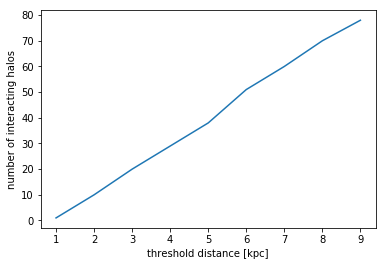

In [31]:
print(number)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,10,1), number)
ax.set_xlabel("threshold distance [kpc]")
ax.set_ylabel("number of interacting halos")

# Computing v_rel by averaging over N nearest stars to the halo
not efficient but good enough for now. Can be combined with compute_dist()

In [32]:
def rel_vel(halo_indices, st, N=10):
    relative = np.zeros((len(halo_indices),4))
    i = 0
    for index in halo_indices:
        
        # compute relative velocity for each star in the stream
        v_hal = hal['host.velocity'][index]
        v_star = part['star']['host.velocity'][st]
        
        # compute distance for each star in the stream
        d_hal = np.tile(hal['host.distance'][index], len(st)).reshape((len(st),3))
        d_star = part['star']['host.distance'][st]
        d_star_hal = np.sqrt(((d_hal - d_star)**2).sum(axis=1))
        
        d_and_v = np.column_stack((d_star_hal, v_star))
        # sort by first column
        d_and_v = d_and_v[d_and_v[:,0].argsort()]
        
        v_star_mean = np.mean(d_and_v[:N,1:], axis=0)
        #print(v_hal, v_star_mean)
        
        relative[i,0] = np.sqrt(((v_hal - v_star_mean)**2).sum())
        relative[i,1:] = v_hal - v_star_mean
 
        i += 1
    return relative

In [33]:
v = rel_vel(halo_indices, st)
print(v)

[[ 180.12886661  128.4759016   -90.96389465   87.55524635]
 [ 115.25943756  -28.9013361   -86.60376282  -70.35082788]
 [ 364.74974654 -261.13176575 -254.55572128    7.34597015]
 [ 165.70292272  -94.72383022   50.90738068  126.06860504]
 [ 423.94773169  158.93275437 -285.2317627   270.39767075]
 [ 236.27661179 -198.46789131 -104.42249527   74.38464813]
 [ 165.93415613 -113.431721    -69.17907486   99.40646076]
 [ 239.61624174 -157.67420616  -93.40413628  154.37116098]
 [ 118.58951339   80.47685204   82.56591825  -27.74559631]
 [ 386.81207604  288.61500092   84.64367218  243.22913513]]


# Computing the interactions

In [34]:
import astropy.units as u
from astropy.constants import G

In [35]:
b = mindist_array * u.kpc
M = hal['mass'][halo_indices] * u.M_sun
v_rel = v[:,0] * u.km/u.s

In [36]:
S_1 = 100*G * M/(v_rel**2 * b)

In [37]:
S_1

<Quantity [3.07774759e-07, 8.73605319e-07, 1.00863367e-06, 1.31220080e-06,
           1.12057739e-08, 2.34548425e-07, 1.18694245e-07, 2.51495839e-07,
           1.70755095e-07, 8.12285443e-07] m3 solMass / (kg km2 kpc)>

In [38]:
S = S_1.to(u.dimensionless_unscaled)

In [39]:
S

<Quantity [0.01983365, 0.05629696, 0.06499847, 0.08456097, 0.00072212,
           0.01511479, 0.00764891, 0.01620692, 0.01100382, 0.05234538]>

# Plotting

In [40]:
# convert velocities into the principal axis frame
v_pa = ut.coordinate.get_coordinates_rotated(v[:,1:], part.principal_axes_vectors)

In [41]:
import matplotlib.colors as c

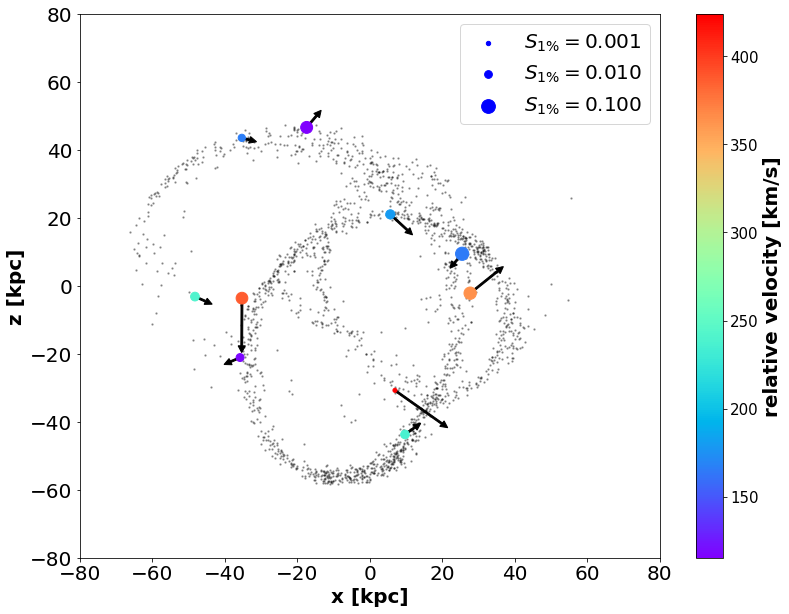

In [82]:
# want to plot in x and z
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(pos_pa[:,0], pos_pa[:,2], s=2, c='black', alpha=0.3)
im = ax.scatter(pos_pa_hal[:,0], pos_pa_hal[:,2], s=600*np.sqrt(S), marker='o', c=v[:,0], cmap='rainbow', zorder=10)
cbar = plt.colorbar(im)
cbar.set_label(label = 'relative velocity [km/s]', size=20, weight='bold')
cbar.ax.tick_params(labelsize=15)
# adding velocity arrows
for i in range(len(pos_pa_hal)):
    ax.arrow(pos_pa_hal[i,0], pos_pa_hal[i,2], v_pa[i,0]/26, v_pa[i,2]/26, 
             fc="k", ec="k", head_width=2, head_length=2, width=0.5)

ax.scatter(90,90, s=600*np.sqrt(0.001), label='$S_{1\%}=0.001$', c='blue')
ax.scatter(90,90, s=600*np.sqrt(0.01), label='$S_{1\%}=0.010$', c='blue')
ax.scatter(90,90, s=600*np.sqrt(0.1), label='$S_{1\%}=0.100$', c='blue')
plt.legend(prop={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.set_xlim((-80, 80))
ax.set_ylim((-80, 80))
ax.set_xlabel('x [kpc]', fontsize=20, fontweight='bold')
ax.set_ylabel('z [kpc]', fontsize=20, fontweight='bold')

fig.savefig('/Users/nondh/Documents/stream/project/darkpy/interaction_600.pdf', dpi=300)

Number of interacting halos as a function of time. FFM pack movie.

In [43]:
len(pos_pa_hal[:,0]) == len(v_pa)

True

In [5]:

enc = np.loadtxt('count.txt')

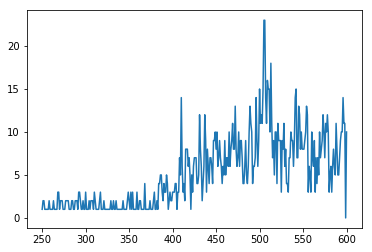

In [8]:
plt.figure()
plt.plot(range(250,601,1),enc[250:601])

Ratio of subhalos from 2 way of reading in from rock_star. see if the different halos are among the low masses ones.. Mass distribution of all the halos. If halo.stellar mass is zero, it means the halo is purely dark matter.

In [2]:
ratio = np.loadtxt('ratio.txt')

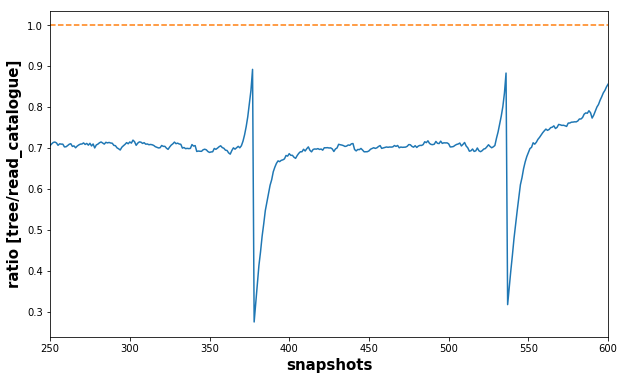

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(250,601,1),ratio[250:601,2])
ax.plot(np.linspace(250,600,10),np.full(10,1), '--')
ax.set_xlabel('snapshots', fontsize=15, fontweight='bold')
ax.set_ylabel('ratio [tree/read_catalogue]', fontsize=15, fontweight='bold')
ax.set_xlim((250,600))
plt.savefig('halos_diff.png', dpi=300)